# Visualize EPS: 

#### Summerize: 

- For all stocks from RawReports folder, read specific Excels sheet into dataframe  
- Add stock name column to df 
- Transform the df 
- Consolidate the df 

#### Analyze:

- Compute something
- Write the computed new data 
- Analyze or visualize the new data 

## 1.1 Imports:

In [1]:
import requests as rq
import pandas as pd 
import time
import datetime
from bs4 import BeautifulSoup
import re
import os


## 1.2 Define Inputs:

>  ⚠️ <span style="color:red"> **Update the CSV File below to read as needed:**</span>

In [2]:
## CAREFULLY UPDATE THIS. 
##  ../Output/SummaryReport/Summary02-Quarterly-Results-yyyymmdd-HHMMSS.csv

input_cvs_file = "../Output/SummaryReports/" + "Summary02-Quarterly-Results-20240817-155741.csv"


In [3]:
df = pd.read_csv(input_cvs_file)
df.head(5)


,Quarterly Results,Stockname,Mar 2021,Jun 2021,Sep 2021,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024,Jun 2024
0,Sales,526433,NaN,41.64,47.70,47.62,54.71,50.92,63.42,54.14,51.94,50.95,50.39,55.72,44.59,52.62
1,Expenses,526433,NaN,36.70,39.98,42.30,51.69,45.54,57.43,48.94,49.74,48.58,48.46,55.37,45.53,48.43
2,Operating Profit,526433,NaN,4.94,7.72,5.32,3.02,5.38,5.99,5.20,2.20,2.37,1.93,0.35,-0.94,4.19
3,OPM %,526433,NaN,11.86%,16.18%,11.17%,5.52%,10.57%,9.44%,9.60%,4.24%,4.65%,3.83%,0.63%,-2.11%,7.96%
4,Other Income,526433,NaN,0.50,0.35,3.89,2.19,2.43,1.58,2.74,1.55,1.98,0.42,1.14,3.31,3.20


## 1.3 Filter EPS:

In [4]:
df_eps = df.loc[(df['Quarterly Results'] == 'EPS in Rs')]
df_eps.head(10)

,Quarterly Results,Stockname,Mar 2021,Jun 2021,Sep 2021,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024,Jun 2024
10,EPS in Rs,526433,NaN,2.99,3.77,4.30,1.54,3.35,2.84,2.25,0.25,0.36,-1.59,-0.19,-2.59,2.83
22,EPS in Rs,532407,NaN,0.11,0.10,0.13,0.06,0.10,0.08,0.11,0.09,0.18,0.20,0.12,0.05,0.21
34,EPS in Rs,544021,NaN,NaN,NaN,NaN,NaN,5.28,6.38,7.06,7.82,7.96,8.10,3.77,4.77,5.21
46,EPS in Rs,AARTIDRUGS,NaN,5.27,4.60,6.29,5.98,3.76,4.18,3.96,6.06,5.17,4.31,3.99,5.15,3.62
58,EPS in Rs,AARTIIND,NaN,4.55,4.14,20.01,5.34,3.75,3.42,3.77,4.11,1.93,2.51,3.42,3.64,3.78
70,EPS in Rs,AARTIPHARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.26,4.73,5.20,5.72,5.82,7.20,6.12
82,EPS in Rs,AARTISURF,NaN,5.32,0.98,-2.62,2.79,4.36,0.38,4.68,5.52,6.18,5.58,7.86,5.50,2.62
94,EPS in Rs,ABB,NaN,3.32,5.66,8.88,17.61,6.62,9.32,14.41,11.56,13.95,17.12,15.98,21.67,20.93
106,EPS in Rs,ACC,NaN,30.32,23.97,14.95,21.10,12.11,-4.65,6.03,12.55,24.82,20.65,28.63,50.31,19.24
118,EPS in Rs,ADANIENT,NaN,2.47,1.93,-0.11,2.77,4.12,4.04,7.19,6.34,5.91,2.00,16.57,3.95,12.76


In [5]:
df_eps = df_eps.drop('Quarterly Results', axis=1)
df_eps.head(10)

,Stockname,Mar 2021,Jun 2021,Sep 2021,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024,Jun 2024
10,526433,NaN,2.99,3.77,4.30,1.54,3.35,2.84,2.25,0.25,0.36,-1.59,-0.19,-2.59,2.83
22,532407,NaN,0.11,0.10,0.13,0.06,0.10,0.08,0.11,0.09,0.18,0.20,0.12,0.05,0.21
34,544021,NaN,NaN,NaN,NaN,NaN,5.28,6.38,7.06,7.82,7.96,8.10,3.77,4.77,5.21
46,AARTIDRUGS,NaN,5.27,4.60,6.29,5.98,3.76,4.18,3.96,6.06,5.17,4.31,3.99,5.15,3.62
58,AARTIIND,NaN,4.55,4.14,20.01,5.34,3.75,3.42,3.77,4.11,1.93,2.51,3.42,3.64,3.78
70,AARTIPHARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.26,4.73,5.20,5.72,5.82,7.20,6.12
82,AARTISURF,NaN,5.32,0.98,-2.62,2.79,4.36,0.38,4.68,5.52,6.18,5.58,7.86,5.50,2.62
94,ABB,NaN,3.32,5.66,8.88,17.61,6.62,9.32,14.41,11.56,13.95,17.12,15.98,21.67,20.93
106,ACC,NaN,30.32,23.97,14.95,21.10,12.11,-4.65,6.03,12.55,24.82,20.65,28.63,50.31,19.24
118,ADANIENT,NaN,2.47,1.93,-0.11,2.77,4.12,4.04,7.19,6.34,5.91,2.00,16.57,3.95,12.76


## 1.4 Sort Column Ordering:

In [6]:
date = '1970-01-01'
df_eps = df_eps.sort_index(
    axis=1, 
    key=lambda x: pd.to_datetime(x, errors='coerce', format='mixed').fillna(date)
)

In [7]:
df_eps.head(5)

,Stockname,Mar 2021,Jun 2021,Sep 2021,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024,Jun 2024
10,526433,NaN,2.99,3.77,4.30,1.54,3.35,2.84,2.25,0.25,0.36,-1.59,-0.19,-2.59,2.83
22,532407,NaN,0.11,0.10,0.13,0.06,0.10,0.08,0.11,0.09,0.18,0.20,0.12,0.05,0.21
34,544021,NaN,NaN,NaN,NaN,NaN,5.28,6.38,7.06,7.82,7.96,8.10,3.77,4.77,5.21
46,AARTIDRUGS,NaN,5.27,4.60,6.29,5.98,3.76,4.18,3.96,6.06,5.17,4.31,3.99,5.15,3.62
58,AARTIIND,NaN,4.55,4.14,20.01,5.34,3.75,3.42,3.77,4.11,1.93,2.51,3.42,3.64,3.78


## 1.5 Transpose Dataframe:

In [8]:
df_eps = df_eps.rename(columns={'Stockname':'Quarter'})
df_eps.head(5)

,Quarter,Mar 2021,Jun 2021,Sep 2021,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024,Jun 2024
10,526433,NaN,2.99,3.77,4.30,1.54,3.35,2.84,2.25,0.25,0.36,-1.59,-0.19,-2.59,2.83
22,532407,NaN,0.11,0.10,0.13,0.06,0.10,0.08,0.11,0.09,0.18,0.20,0.12,0.05,0.21
34,544021,NaN,NaN,NaN,NaN,NaN,5.28,6.38,7.06,7.82,7.96,8.10,3.77,4.77,5.21
46,AARTIDRUGS,NaN,5.27,4.60,6.29,5.98,3.76,4.18,3.96,6.06,5.17,4.31,3.99,5.15,3.62
58,AARTIIND,NaN,4.55,4.14,20.01,5.34,3.75,3.42,3.77,4.11,1.93,2.51,3.42,3.64,3.78


In [9]:
df_eps = df_eps.set_index('Quarter').T
df_eps.head(5)

Quarter,526433,532407,544021,AARTIDRUGS,AARTIIND,AARTIPHARM,AARTISURF,ABB,ACC,ADANIENT,...,UNITDSPR,UNOMINDA,VBL,VINATIORGA,MANYAVAR,VOLTAS,WESTLIFE,WIPRO,YASHO,ZENTEC
Mar 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jun 2021,2.99,0.11,NaN,5.27,4.55,NaN,5.32,3.32,30.32,2.47,...,0.76,0.28,2.37,7.87,3.65,3.68,-2.14,5.92,10.01,-0.14
Sep 2021,3.77,0.10,NaN,4.60,4.14,NaN,0.98,5.66,23.97,1.93,...,4.02,1.66,1.85,7.91,2.20,3.13,-0.28,5.35,12.44,-0.00
Dec 2021,4.30,0.13,NaN,6.29,20.01,NaN,-2.62,8.88,14.95,-0.11,...,4.12,1.77,0.13,8.10,5.27,2.90,1.34,5.42,12.71,-0.02
Mar 2022,1.54,0.06,NaN,5.98,5.34,NaN,2.79,17.61,21.10,2.77,...,2.50,2.53,1.96,9.84,3.65,5.52,0.98,5.63,11.69,0.42


In [10]:
output_path = "../Output/SummaryReports/"+"Visual01-EPS-"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+".csv"
df_eps.to_csv(output_path,sep=",")

df = pd.read_csv(output_path)

df.rename( columns={'Unnamed: 0':'Quarters'}, inplace=True )

df.to_csv(output_path,sep=",", index=False)


## 1.6 Plot Values:

[Reference](https://plotly.com/python/dropdowns/#update-dropdown)

In [11]:
df.head(5)

,Quarters,526433,532407,544021,AARTIDRUGS,AARTIIND,AARTIPHARM,AARTISURF,ABB,ACC,...,UNITDSPR,UNOMINDA,VBL,VINATIORGA,MANYAVAR,VOLTAS,WESTLIFE,WIPRO,YASHO,ZENTEC
0,Mar 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jun 2021,2.99,0.11,NaN,5.27,4.55,NaN,5.32,3.32,30.32,...,0.76,0.28,2.37,7.87,3.65,3.68,-2.14,5.92,10.01,-0.14
2,Sep 2021,3.77,0.10,NaN,4.60,4.14,NaN,0.98,5.66,23.97,...,4.02,1.66,1.85,7.91,2.20,3.13,-0.28,5.35,12.44,-0.00
3,Dec 2021,4.30,0.13,NaN,6.29,20.01,NaN,-2.62,8.88,14.95,...,4.12,1.77,0.13,8.10,5.27,2.90,1.34,5.42,12.71,-0.02
4,Mar 2022,1.54,0.06,NaN,5.98,5.34,NaN,2.79,17.61,21.10,...,2.50,2.53,1.96,9.84,3.65,5.52,0.98,5.63,11.69,0.42


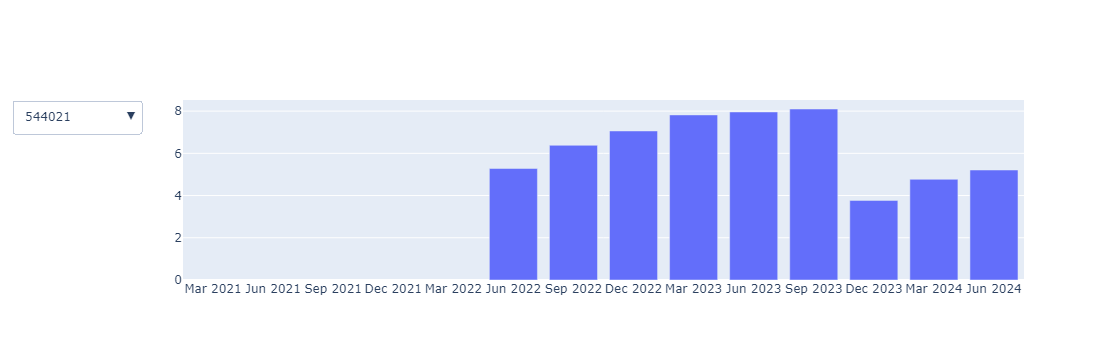

In [21]:
import plotly.graph_objects as go

fig = go.Figure()

# add trace only for first stock
x = df['Quarters']
y = df[df.columns[1]]  # fisrt stock

fig.add_traces(go.Bar(x=x, y=y))

# create `list` with a `dict` for each column
buttons = [
            {
             'method': 'update', 
             'label': col, 
             'args': [ {'y': [df[col]]} ]
            } 
            for col in df.iloc[:, 1:]
          ]

# add menus
updatemenus = [{'buttons': buttons,
                'direction': 'down',
                'showactive': True,}]

# update layout with buttons, and show the figure
fig.update_layout(updatemenus=updatemenus)

fig.show()

## 1.7 Save HTML File:

In [22]:
output_path = "../Output/SummaryReports/"+"Graph01-EPS-"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+".html"

fig.write_html(output_path)